## Clustering with K-Means

### Import libraries and load data

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load data 
datadir_prep = 'dataset_prepared'
combined_df = pd.read_csv(os.path.join(datadir_prep, 'prepared_data.csv'))

clustering_df = combined_df[['Recency_cat', 'Frequency_cat', 'TotalAmount_cat', 'Duration_cat']].dropna().reindex().astype(int)
combined_df, clustering_df

(        UserID  Gender    State ReferralSource   BirthDate State_Grouped  \
 0            3  Female   Tehran  Acquaintances  1984-11-07        Tehran   
 1            8    Male   Tehran  Acquaintances  1985-09-15        Tehran   
 2           14    Male   Tehran  Acquaintances  1977-09-29        Tehran   
 3           17  Female   Tehran  Acquaintances  1946-10-15        Tehran   
 4           18  Female   Tehran  Acquaintances  1955-12-28        Tehran   
 ...        ...     ...      ...            ...         ...           ...   
 221172  262138  Female  Isfahan    Application  1996-02-28         Other   
 221173  262139    Male   Tehran    Application  1978-07-01        Tehran   
 221174  262140    Male   Tehran    Application  1975-12-22        Tehran   
 221175  262141    Male     Fars    Application  1994-08-22         Other   
 221176  262143    Male   Tehran       Agencies  1971-04-01        Tehran   
 
          Age  TotalAmount  Frequency  Recency  Duration  Recency_cat  \
 

### Apply the Elbow method to find the optimal value of k

In [5]:
# from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score

# figdir = 'figures'
# os.makedirs(figdir, exist_ok=True)

# nb_clusters = range(2, 10)

# wss = [] # store Within-Cluster Sum of Squares values
# sil_scores = [] # store the silhouette scores for each number of clusters
# dbi_scores = [] # store the Davies-Bouldin index for internal validation: lower -> cluster is more compact and separated

# # run on a sample to reduce time
# clustering_df_sample = clustering_df.sample(n=30000, random_state=42)

# for k in nb_clusters:
#   print('Processing k =', k)
#   kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=500, tol=0.0001, random_state=111, algorithm='lloyd')
#   kmeans.fit(clustering_df_sample)

#   inertia = kmeans.inertia_
#   print("Inertia =", inertia)
#   wss.append(inertia)

#   # predict the cluster labels
#   labels = kmeans.predict(clustering_df_sample)
#   print('Labels =', labels)

#   silscore = silhouette_score(clustering_df_sample, labels)
#   print('Silhouette score = ', silscore)
#   sil_scores.append(silscore)

#   dbi = davies_bouldin_score(clustering_df_sample, labels)
#   print('Davies-Bouldin score = ', dbi)
#   dbi_scores.append(dbi)


# # plot the elbow curve
# plt.figure(figsize=(10, 6))
# plt.plot(nb_clusters, wss, marker='o')
# plt.title('Elbow Method for finding the Optimal Number of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WSS')
# plt.xticks(nb_clusters)
# plt.grid(True)
# plt.savefig(os.path.join(figdir, 'elbow.png'), dpi=450)
# plt.show()

# # plot the silhouette scores with numbers of clusters
# plt.figure(figsize=(8, 6))
# plt.plot(nb_clusters, sil_scores, marker='o', linestyle='-', color='b')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score vs Number of Clusters')
# plt.xticks(nb_clusters)
# plt.grid(True)
# plt.savefig(os.path.join(figdir, 'silhouette.png'), dpi=450)
# plt.show()

# # plot the DBI with numbers of clusters
# plt.figure(figsize=(8, 6))
# plt.plot(nb_clusters, dbi_scores, marker='o', linestyle='-', color='b')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Davies-Bouldin Index')
# plt.title('Davies-Bouldin Index vs Number of Clusters')
# plt.xticks(nb_clusters)
# plt.grid(True)
# plt.savefig(os.path.join(figdir, 'dbi.png'), dpi=450)
# plt.show()


### Select value of k, group data by cluster and calculate mean for each score

1. Elbow Method (WSS - Within-Cluster Sum of Squares)
    - WSS (Inertia) decreases as 𝑘 increases.
    - The rate of decrease slows down after 𝑘 = 4, forming an "elbow," indicating that adding more clusters beyond this point yields diminishing returns.

2. Silhouette Score (Measures Cluster Cohesion and Separation)
    - The Silhouette Score is highest for 𝑘 = 2(0.998), but such a high score often means one dominant cluster and poor separation.
    - For 𝑘 = 4, the score is 0.32, which is still high, meaning well-separated clusters.
    - Beyond 𝑘 = 4, the score starts decreasing significantly.

3. Davies-Bouldin Index (Lower is Better)
    - 𝑘 = 2 has the lowest DBI (0.001), but again, likely due to one dominant cluster.
    - 𝑘 = 4 has a DBI of 1.21, which is relatively low, indicating good cluster compactness.
    - Beyond 𝑘 = 4, the DBI starts increasing (higher values indicate worse clustering).

4. Practical Interpretation
    - 𝑘 = 2 and 𝑘 = 3 might oversimplify the dataset, grouping distinct user behaviors together.
    - 𝑘 = 5 and beyond start showing worse compactness and separation.
    - 𝑘 = 4 is a good balance between meaningful segmentation and performance

### Clustering Analysis Summary



In [6]:
# Create a copy of X_kmeans
X_kmeans = clustering_df.copy()

# clustering_df[['Recency', 'Frequency', 'TotalAmount', 'Duration']] = clustering_df[['Recency', 'Frequency', 'TotalAmount', 'Duration']].astype(int)

# Group by cluster and calculate the mean for each score
clustering_df['Cluster'] = KMeans(n_clusters=4, random_state=111).fit_predict(clustering_df)
cluster_means = clustering_df.groupby('Cluster').mean()

# Calculate the number of records and percentage for each cluster
cluster_counts = clustering_df['Cluster'].value_counts().sort_index()
cluster_percentages = (cluster_counts / len(clustering_df)) * 100
cluster_counts_summary = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Count': cluster_counts.values,
    'Percentage': cluster_percentages.values    
})

# Calculate the overall mean for each score
overall_mean = clustering_df[['Recency_cat', 'Frequency_cat', 'TotalAmount_cat', 'Duration_cat']].mean()
overall_mean.name = 'Overall'

# Merge cluster_summary with cluster_counts
cluster_summary = cluster_means.merge(cluster_counts_summary, left_index=True, right_on='Cluster')

# Append the overall mean to the cluster summary
overall_summary = pd.DataFrame([overall_mean], columns=cluster_summary.columns[:-2])
overall_summary['Cluster'] = 'Overall'
overall_summary['Count'] = len(clustering_df)
overall_summary['Percentage'] = 100.0

cluster_summary = pd.concat([cluster_summary, overall_summary], ignore_index=True)

# Display the results
display("cluster_means")
display(cluster_means)
display("overall_summary")
display(overall_summary)
print("clustering_df:")
display(clustering_df)
print("Cluster Summary:")
display(cluster_summary)

cluster_summary.copy().round(3).to_clipboard()

'cluster_means'

,Recency_cat,Frequency_cat,TotalAmount_cat,Duration_cat
Cluster,,,,
0,1.679309,1.879624,1.688208,1.594039
1,3.600749,1.284996,1.445587,1.083978
2,1.524725,3.667885,3.259761,3.329753
3,3.198141,1.585881,3.401900,1.405067


'overall_summary'

,Recency_cat,Frequency_cat,TotalAmount_cat,Duration_cat,Cluster,Count,Percentage
Overall,2.50827,2.221762,2.504255,1.966343,Overall,221174,100.0


clustering_df:


,Recency_cat,Frequency_cat,TotalAmount_cat,Duration_cat,Cluster
0,1,5,4,4,2
1,4,1,4,1,3
2,3,2,3,2,3
3,1,4,4,4,2
4,4,1,3,1,3
...,...,...,...,...,...
221172,1,2,1,1,0
221173,1,4,2,1,0
221174,1,5,1,2,2
221175,2,3,1,1,0


Cluster Summary:


,Recency_cat,Frequency_cat,TotalAmount_cat,Duration_cat,Cluster,Count,Percentage
0,1.679309,1.879624,1.688208,1.594039,0,38654,17.476738
1,3.600749,1.284996,1.445587,1.083978,1,62457,28.238853
2,1.524725,3.667885,3.259761,3.329753,2,71123,32.157035
3,3.198141,1.585881,3.401900,1.405067,3,48940,22.127375
4,2.508270,2.221762,2.504255,1.966343,Overall,221174,100.000000


### Interpret Cluster Characteristics

,Recency_cat,Frequency_cat,TotalAmount_cat,Duration_cat,Cluster,Cluster_Label
0,1,5,4,4,2,New Donors
1,4,1,4,1,3,Lapsed Big Donors
2,3,2,3,2,3,Lapsed Big Donors
3,1,4,4,4,2,New Donors
4,4,1,3,1,3,Lapsed Big Donors
...,...,...,...,...,...,...
221172,1,2,1,1,0,Loyal High-Value Donors
221173,1,4,2,1,0,Loyal High-Value Donors
221174,1,5,1,2,2,New Donors
221175,2,3,1,1,0,Loyal High-Value Donors


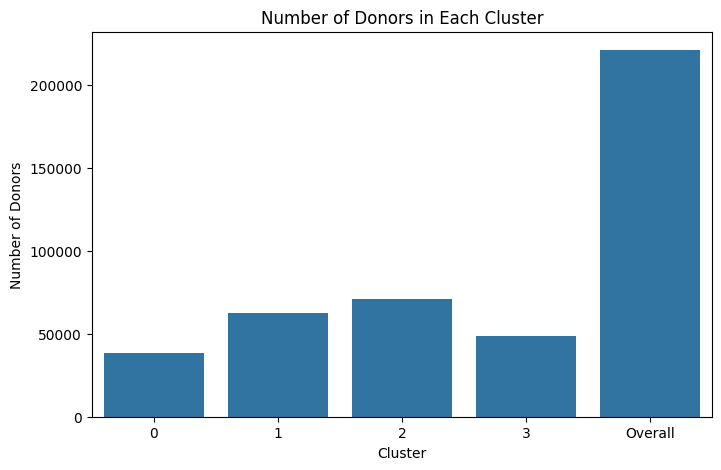

In [7]:
# Assign cluster labels based on observed characteristics
cluster_labels = {
    0: "Loyal High-Value Donors",
    1: "Infrequent Small Donors",
    2: "New Donors",
    3: "Lapsed Big Donors"
}

# Map labels to cluster numbers
clustering_df['Cluster_Label'] = clustering_df['Cluster'].map(cluster_labels)

display(clustering_df)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=cluster_summary['Cluster'].astype(str), y=cluster_summary['Count'])
plt.xlabel("Cluster")
plt.ylabel("Number of Donors")
plt.title("Number of Donors in Each Cluster")
plt.savefig('figures/cluster_summary.png', dpi=450)
plt.show()



In [8]:
# Define RFM weights
rfm_weights = {
    'Recency_cat': 0.25,
    'Frequency_cat': 0.25,
    'TotalAmount_cat': 0.25,
    'Duration_cat': 0.25
}

# Add mean score columns to cluster_summary
cluster_summary['mean_Recency_Score'] = cluster_summary['Recency_cat'] / cluster_summary['Recency_cat'].max()
cluster_summary['mean_Frequency_Score'] = cluster_summary['Frequency_cat'] / cluster_summary['Frequency_cat'].max()
cluster_summary['mean_Monetary_Score'] = cluster_summary['TotalAmount_cat'] / cluster_summary['TotalAmount_cat'].max()
cluster_summary['mean_D_Score'] = cluster_summary['Duration_cat'] / cluster_summary['Duration_cat'].max()

# Calculate CLV
cluster_summary['CLV'] = (cluster_summary['mean_Recency_Score'] * rfm_weights['Recency_cat'] + 
                          cluster_summary['mean_Frequency_Score'] * rfm_weights['Frequency_cat'] + 
                          cluster_summary['mean_Monetary_Score'] * rfm_weights['TotalAmount_cat'] +
                          cluster_summary['mean_D_Score'] * rfm_weights['Duration_cat'])

# Sort by CLV
cluster_summary = cluster_summary.sort_values(by='CLV', ascending=False)
display(cluster_summary)


,Recency_cat,Frequency_cat,TotalAmount_cat,Duration_cat,Cluster,Count,Percentage,mean_Recency_Score,mean_Frequency_Score,mean_Monetary_Score,mean_D_Score,CLV
2,1.524725,3.667885,3.259761,3.329753,2,71123,32.157035,0.423447,1.000000,0.958218,1.000000,0.845416
3,3.198141,1.585881,3.401900,1.405067,3,48940,22.127375,0.888188,0.432369,1.000000,0.421974,0.685633
4,2.508270,2.221762,2.504255,1.966343,Overall,221174,100.000000,0.696597,0.605734,0.736134,0.590537,0.657250
1,3.600749,1.284996,1.445587,1.083978,1,62457,28.238853,1.000000,0.350337,0.424935,0.325543,0.525204
0,1.679309,1.879624,1.688208,1.594039,0,38654,17.476738,0.466378,0.512455,0.496254,0.478726,0.488453


### Post Processing

#### Merge Datasets on UserID

In [9]:
# Use combined_df as the merged dataset

# Check merged data
# Add the 'Cluster' column from clustering_df to combined_df
combined_df['Cluster'] = clustering_df['Cluster']
# Filter and display rows where Cluster equals 1
# cluster_1_df = combined_df[combined_df['Cluster'] == 1]
# display(cluster_1_df)
# Check merged data
print(combined_df.head())


   UserID  Gender   State ReferralSource   BirthDate State_Grouped   Age  \
0       3  Female  Tehran  Acquaintances  1984-11-07        Tehran  40.0   
1       8    Male  Tehran  Acquaintances  1985-09-15        Tehran  39.0   
2      14    Male  Tehran  Acquaintances  1977-09-29        Tehran  47.0   
3      17  Female  Tehran  Acquaintances  1946-10-15        Tehran  78.0   
4      18  Female  Tehran  Acquaintances  1955-12-28        Tehran  69.0   

   TotalAmount  Frequency  Recency  Duration  Recency_cat  Frequency_cat  \
0    8476500.0       21.0   2418.0     824.0          1.0            5.0   
1    7364000.0        1.0   3033.0       0.0          4.0            1.0   
2    3200000.0        2.0   2660.0     232.0          3.0            2.0   
3   57840000.0        8.0   2442.0     739.0          1.0            4.0   
4    2248000.0        1.0   2871.0       0.0          4.0            1.0   

   TotalAmount_cat  Duration_cat  Log_TotalAmount  Cluster  
0              4.0       

#### Customer Profiling

In [10]:
from scipy.stats import f_oneway

anova_results = {}
features = ['Recency_cat', 'Frequency_cat', 'TotalAmount_cat', 'Duration_cat']

for feature in features:
    groups = [clustering_df[clustering_df['Cluster'] == c][feature] for c in clustering_df['Cluster'].unique()]
    stat, p_value = f_oneway(*groups)
    anova_results[feature] = p_value

# Display results
print("ANOVA Test Results:")
anova = pd.DataFrame(anova_results, index=["p-value"]).T
print(anova)
anova.to_clipboard()

from scipy.stats import chi2_contingency

# Example: Checking gender distribution across clusters
contingency_table = pd.crosstab(combined_df['Gender'], clustering_df['Cluster'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square test p-value: {p:.4f}")

def classify_customer(row):
    if row['Frequency'] > 10 and row['TotalAmount'] > 500:
        return "High-Value Loyal Donor"
    elif row['Recency'] < 30 and row['TotalAmount'] < 100:
        return "New Low-Value Donor"
    elif row['Duration'] > 365 and row['TotalAmount'] > 1000:
        return "Long-Term High Donor"
    else:
        return "Occasional Small Donor"

combined_df['Customer_Profile'] = combined_df.apply(classify_customer, axis=1)

# Display the updated dataframe with the new 'Customer_Profile' column
print("Updated DataFrame with Customer Profiles:")
display(combined_df[['UserID', 'Customer_Profile']].head())



ANOVA Test Results:
                 p-value
Recency_cat          0.0
Frequency_cat        0.0
TotalAmount_cat      0.0
Duration_cat         0.0
Chi-square test p-value: 0.0000
Updated DataFrame with Customer Profiles:


,UserID,Customer_Profile
0,3,High-Value Loyal Donor
1,8,Occasional Small Donor
2,14,Occasional Small Donor
3,17,Long-Term High Donor
4,18,Occasional Small Donor


#### Visualize Target Group Characteristics

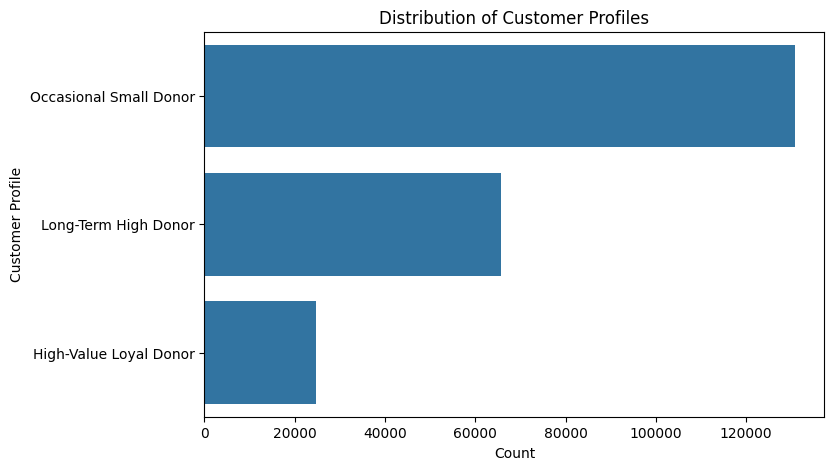

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(y=combined_df['Customer_Profile'], order=combined_df['Customer_Profile'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Customer Profile")
plt.title("Distribution of Customer Profiles")
plt.show()


#### Hypothesis

In [12]:
from scipy.stats import f_oneway

anova_results = {}
features = ['Recency_cat', 'Frequency_cat', 'TotalAmount_cat', 'Duration_cat']

for feature in features:
    groups = [clustering_df[clustering_df['Cluster'] == c][feature] for c in clustering_df['Cluster'].unique()]
    stat, p_value = f_oneway(*groups)
    anova_results[feature] = p_value

# Display results
anova_df = pd.DataFrame(anova_results, index=["p-value"]).T
display(anova_df)

display(combined_df)

,p-value
Recency_cat,0.0
Frequency_cat,0.0
TotalAmount_cat,0.0
Duration_cat,0.0


,UserID,Gender,State,ReferralSource,BirthDate,State_Grouped,Age,TotalAmount,Frequency,Recency,Duration,Recency_cat,Frequency_cat,TotalAmount_cat,Duration_cat,Log_TotalAmount,Cluster,Customer_Profile
0,3,Female,Tehran,Acquaintances,1984-11-07,Tehran,40.0,8476500.0,21.0,2418.0,824.0,1.0,5.0,4.0,4.0,15.952808,2.0,High-Value Loyal Donor
1,8,Male,Tehran,Acquaintances,1985-09-15,Tehran,39.0,7364000.0,1.0,3033.0,0.0,4.0,1.0,4.0,1.0,15.812114,3.0,Occasional Small Donor
2,14,Male,Tehran,Acquaintances,1977-09-29,Tehran,47.0,3200000.0,2.0,2660.0,232.0,3.0,2.0,3.0,2.0,14.978662,3.0,Occasional Small Donor
3,17,Female,Tehran,Acquaintances,1946-10-15,Tehran,78.0,57840000.0,8.0,2442.0,739.0,1.0,4.0,4.0,4.0,17.873191,2.0,Long-Term High Donor
4,18,Female,Tehran,Acquaintances,1955-12-28,Tehran,69.0,2248000.0,1.0,2871.0,0.0,4.0,1.0,3.0,1.0,14.625552,3.0,Occasional Small Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221172,262138,Female,Isfahan,Application,1996-02-28,Other,29.0,80000.0,3.0,2468.0,207.0,1.0,2.0,1.0,1.0,11.289794,0.0,Occasional Small Donor
221173,262139,Male,Tehran,Application,1978-07-01,Tehran,46.0,680000.0,6.0,2400.0,166.0,1.0,4.0,2.0,1.0,13.429850,0.0,Occasional Small Donor
221174,262140,Male,Tehran,Application,1975-12-22,Tehran,49.0,220008.0,16.0,2401.0,279.0,1.0,5.0,1.0,2.0,12.301424,2.0,High-Value Loyal Donor
221175,262141,Male,Fars,Application,1994-08-22,Other,30.0,70000.0,5.0,2483.0,198.0,2.0,3.0,1.0,1.0,11.156265,0.0,Occasional Small Donor


In [13]:
import pandas as pd
# Load the CSV in chunks
chunk_size = 10000  # Adjust as needed
transactional_chunks = pd.read_csv('datasets/TransactionalData.csv', usecols=['UserID', 'SupportType'], chunksize=chunk_size)

# Process chunks separately and append to list
chunks = []
for chunk in transactional_chunks:
    chunks.append(chunk)

# Concatenate all chunks into a DataFrame
transactional_df = pd.concat(chunks, ignore_index=True)

# Now merge with combined_df
print('Before merge:')
print('combined_df')
display(combined_df)

print('transactional_df')
display(transactional_df)

combined_df = combined_df[['UserID', 'ReferralSource', 'Gender', 'State_Grouped', 'Age', 'TotalAmount', 'Frequency', 'Recency', 'Duration','Customer_Profile', 'Cluster']]
merged_combined_df = combined_df.merge(transactional_df, on='UserID', how='left')

print("After merge:")
display(merged_combined_df)


Before merge:
combined_df


,UserID,Gender,State,ReferralSource,BirthDate,State_Grouped,Age,TotalAmount,Frequency,Recency,Duration,Recency_cat,Frequency_cat,TotalAmount_cat,Duration_cat,Log_TotalAmount,Cluster,Customer_Profile
0,3,Female,Tehran,Acquaintances,1984-11-07,Tehran,40.0,8476500.0,21.0,2418.0,824.0,1.0,5.0,4.0,4.0,15.952808,2.0,High-Value Loyal Donor
1,8,Male,Tehran,Acquaintances,1985-09-15,Tehran,39.0,7364000.0,1.0,3033.0,0.0,4.0,1.0,4.0,1.0,15.812114,3.0,Occasional Small Donor
2,14,Male,Tehran,Acquaintances,1977-09-29,Tehran,47.0,3200000.0,2.0,2660.0,232.0,3.0,2.0,3.0,2.0,14.978662,3.0,Occasional Small Donor
3,17,Female,Tehran,Acquaintances,1946-10-15,Tehran,78.0,57840000.0,8.0,2442.0,739.0,1.0,4.0,4.0,4.0,17.873191,2.0,Long-Term High Donor
4,18,Female,Tehran,Acquaintances,1955-12-28,Tehran,69.0,2248000.0,1.0,2871.0,0.0,4.0,1.0,3.0,1.0,14.625552,3.0,Occasional Small Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221172,262138,Female,Isfahan,Application,1996-02-28,Other,29.0,80000.0,3.0,2468.0,207.0,1.0,2.0,1.0,1.0,11.289794,0.0,Occasional Small Donor
221173,262139,Male,Tehran,Application,1978-07-01,Tehran,46.0,680000.0,6.0,2400.0,166.0,1.0,4.0,2.0,1.0,13.429850,0.0,Occasional Small Donor
221174,262140,Male,Tehran,Application,1975-12-22,Tehran,49.0,220008.0,16.0,2401.0,279.0,1.0,5.0,1.0,2.0,12.301424,2.0,High-Value Loyal Donor
221175,262141,Male,Fars,Application,1994-08-22,Other,30.0,70000.0,5.0,2483.0,198.0,2.0,3.0,1.0,1.0,11.156265,0.0,Occasional Small Donor


transactional_df


,UserID,SupportType
0,174731,Membership Fee
1,51006,Cash
2,145833,Membership Fee
3,177032,Membership Fee
4,147147,Membership Fee
...,...,...
1490792,262234,Cash
1490793,278235,Membership Fee
1490794,236062,Household Fund
1490795,254661,Membership Fee


After merge:


,UserID,ReferralSource,Gender,State_Grouped,Age,TotalAmount,Frequency,Recency,Duration,Customer_Profile,Cluster,SupportType
0,3,Acquaintances,Female,Tehran,40.0,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor,2.0,Household Fund
1,3,Acquaintances,Female,Tehran,40.0,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor,2.0,Household Fund
2,3,Acquaintances,Female,Tehran,40.0,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor,2.0,Membership Fee
3,3,Acquaintances,Female,Tehran,40.0,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor,2.0,Membership Fee
4,3,Acquaintances,Female,Tehran,40.0,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor,2.0,Household Fund
...,...,...,...,...,...,...,...,...,...,...,...,...
1283458,262141,Application,Male,Other,30.0,70000.0,5.0,2483.0,198.0,Occasional Small Donor,0.0,Membership Fee
1283459,262141,Application,Male,Other,30.0,70000.0,5.0,2483.0,198.0,Occasional Small Donor,0.0,Membership Fee
1283460,262141,Application,Male,Other,30.0,70000.0,5.0,2483.0,198.0,Occasional Small Donor,0.0,Membership Fee
1283461,262141,Application,Male,Other,30.0,70000.0,5.0,2483.0,198.0,Occasional Small Donor,0.0,Membership Fee


In [14]:

merged_data_H = merged_combined_df.drop(columns=['Recency', 'Frequency', 'TotalAmount', 'Duration'])
merged_data_H["Target"] = merged_combined_df["Cluster"].apply(lambda x: 1 if x == 3 else 0)
combined_df["Target"] = combined_df["Cluster"].apply(lambda x: 1 if x == 3 else 0)

print('merged_combined_df')
display(merged_data_H)

print('combined_df')
display(combined_df)

merged_combined_df


C:\Users\longs\AppData\Local\Temp\ipykernel_23124\3187186957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df["Target"] = combined_df["Cluster"].apply(lambda x: 1 if x == 3 else 0)


,UserID,ReferralSource,Gender,State_Grouped,Age,Customer_Profile,Cluster,SupportType,Target
0,3,Acquaintances,Female,Tehran,40.0,High-Value Loyal Donor,2.0,Household Fund,0
1,3,Acquaintances,Female,Tehran,40.0,High-Value Loyal Donor,2.0,Household Fund,0
2,3,Acquaintances,Female,Tehran,40.0,High-Value Loyal Donor,2.0,Membership Fee,0
3,3,Acquaintances,Female,Tehran,40.0,High-Value Loyal Donor,2.0,Membership Fee,0
4,3,Acquaintances,Female,Tehran,40.0,High-Value Loyal Donor,2.0,Household Fund,0
...,...,...,...,...,...,...,...,...,...
1283458,262141,Application,Male,Other,30.0,Occasional Small Donor,0.0,Membership Fee,0
1283459,262141,Application,Male,Other,30.0,Occasional Small Donor,0.0,Membership Fee,0
1283460,262141,Application,Male,Other,30.0,Occasional Small Donor,0.0,Membership Fee,0
1283461,262141,Application,Male,Other,30.0,Occasional Small Donor,0.0,Membership Fee,0


combined_df


,UserID,ReferralSource,Gender,State_Grouped,Age,TotalAmount,Frequency,Recency,Duration,Customer_Profile,Cluster,Target
0,3,Acquaintances,Female,Tehran,40.0,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor,2.0,0
1,8,Acquaintances,Male,Tehran,39.0,7364000.0,1.0,3033.0,0.0,Occasional Small Donor,3.0,1
2,14,Acquaintances,Male,Tehran,47.0,3200000.0,2.0,2660.0,232.0,Occasional Small Donor,3.0,1
3,17,Acquaintances,Female,Tehran,78.0,57840000.0,8.0,2442.0,739.0,Long-Term High Donor,2.0,0
4,18,Acquaintances,Female,Tehran,69.0,2248000.0,1.0,2871.0,0.0,Occasional Small Donor,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
221172,262138,Application,Female,Other,29.0,80000.0,3.0,2468.0,207.0,Occasional Small Donor,0.0,0
221173,262139,Application,Male,Tehran,46.0,680000.0,6.0,2400.0,166.0,Occasional Small Donor,0.0,0
221174,262140,Application,Male,Tehran,49.0,220008.0,16.0,2401.0,279.0,High-Value Loyal Donor,2.0,0
221175,262141,Application,Male,Other,30.0,70000.0,5.0,2483.0,198.0,Occasional Small Donor,0.0,0


##### The hypothesis test between the Gender variable and the Target

In [15]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table for 'Gender' and 'Target'
# display(merged_combined_df)
contingency_table = pd.crosstab(combined_df['Gender'], combined_df['Target']) # combined_df: error -> changed to merged_data_H

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the contingency table
print("Contingency Table for Gender and Target:")
print(contingency_table)

# Display the chi-squared value, p-value, and degrees of freedom
print(f"\nChi-squared value: {chi2:.6f}")
print(f"P-value: {p:.30f}")
print(f"Degrees of freedom: {dof}")

# Calculate row percentages
row_percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print("\nRow Percentages for Gender:")
print(row_percentages)


Contingency Table for Gender and Target:
Target      0      1
Gender              
Female  85701  24996
Male    86434  23920

Chi-squared value: 26.205333
P-value: 0.000000306973559546210937893366
Degrees of freedom: 1

Row Percentages for Gender:
Target          0          1
Gender                      
Female  77.419442  22.580558
Male    78.324302  21.675698


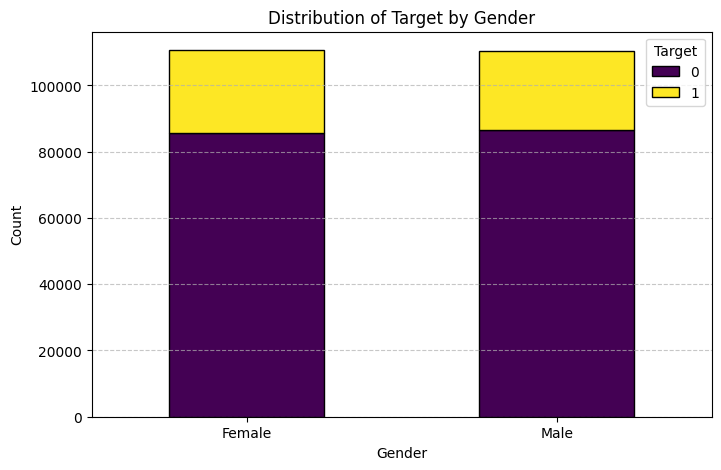

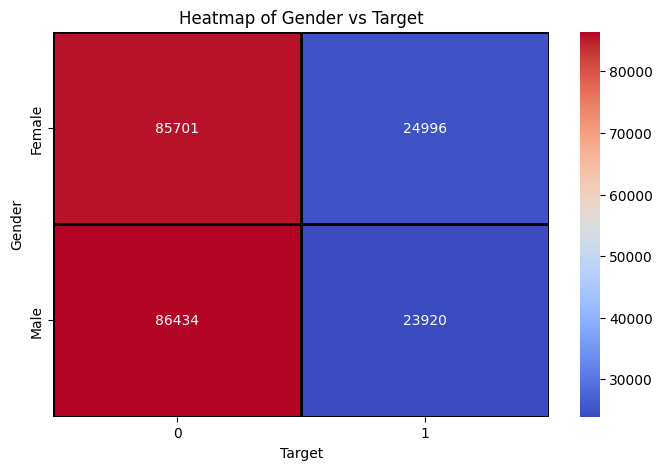

In [16]:
import matplotlib.pyplot as plt

# Plot stacked bar chart
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis', edgecolor='black')

plt.title('Distribution of Target by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Target')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', linewidths=1, linecolor='black')

plt.title('Heatmap of Gender vs Target')
plt.xlabel('Target')
plt.ylabel('Gender')

plt.show()

In [17]:
# Calculate expected frequencies using chi2_contingency
_, _, _, expected_frequencies = chi2_contingency(contingency_table)

# Calculate the percentage of cells with expected counts less than 5
percentage_less_than_5 = (expected_frequencies < 5).sum() / expected_frequencies.size * 100

print(f"Percentage of cells with expected counts less than 5: {percentage_less_than_5:.2f}%")

Percentage of cells with expected counts less than 5: 0.00%


In [18]:
# Ensure expected_frequencies matches the shape of contingency_table
expected_frequencies_resized = expected_frequencies[:contingency_table.shape[0], :contingency_table.shape[1]]

# Calculate residuals
residuals = contingency_table - expected_frequencies_resized

# Display the residuals
print("Residuals (Observed - Expected):")
print(residuals)

Residuals (Observed - Expected):
Target           0           1
Gender                        
Female -500.049057  500.049057
Male    500.049057 -500.049057


In [19]:
# Create a contingency table for 'Gender' and 'Target'
contingency_table = pd.crosstab(combined_df['Gender'], combined_df['Target'])

# Extract values from the contingency table
a = contingency_table.iloc[0, 0]  # Women, Target = 0
b = contingency_table.iloc[0, 1]  # Women, Target = 1
c = contingency_table.iloc[1, 0]  # Men, Target = 0
d = contingency_table.iloc[1, 1]  # Men, Target = 1

# Calculate odds ratio
odds_ratio = (a * d) / (b * c)

# Display the contingency table and odds ratio
print("Contingency Table:")
print(contingency_table)
print(f"Odds Ratio: {odds_ratio:.2f}")


Contingency Table:
Target      0      1
Gender              
Female  85701  24996
Male    86434  23920
Odds Ratio: 0.95


##### The hypothesis test between the ReferralSource variable and the Target

In [20]:
from scipy.stats import chi2_contingency

# Create a contingency table for 'ReferralSource' and 'Target'
referral_contingency_table = pd.crosstab(combined_df['ReferralSource'], combined_df['Target'])

# Perform the chi-square test
chi2_referral, p_referral, dof_referral, expected_referral = chi2_contingency(referral_contingency_table)

# Display the contingency table
print("Contingency Table for ReferralSource and Target:")
print(referral_contingency_table)

# Display the chi-squared value, p-value, and degrees of freedom
print(f"\nChi-squared value: {chi2_referral:.6f}")
print(f"P-value: {p_referral:.30f}")
print(f"Degrees of freedom: {dof_referral}")

# Calculate row percentages
referral_row_percentages = referral_contingency_table.div(referral_contingency_table.sum(axis=1), axis=0) * 100
print("\nRow Percentages for ReferralSource:")
print(referral_row_percentages)

Contingency Table for ReferralSource and Target:
Target               0      1
ReferralSource               
Acquaintances    14026   4222
Advertisements    9376   2160
Agencies         22361   7594
Application      21282    165
Public Programs   1398    467
SMS                137     28
Unknown          79278  31919
Website          24379   2385

Chi-squared value: 11463.508357
P-value: 0.000000000000000000000000000000
Degrees of freedom: 7

Row Percentages for ReferralSource:
Target                   0          1
ReferralSource                       
Acquaintances    76.863218  23.136782
Advertisements   81.276006  18.723994
Agencies         74.648640  25.351360
Application      99.230662   0.769338
Public Programs  74.959786  25.040214
SMS              83.030303  16.969697
Unknown          71.295089  28.704911
Website          91.088776   8.911224


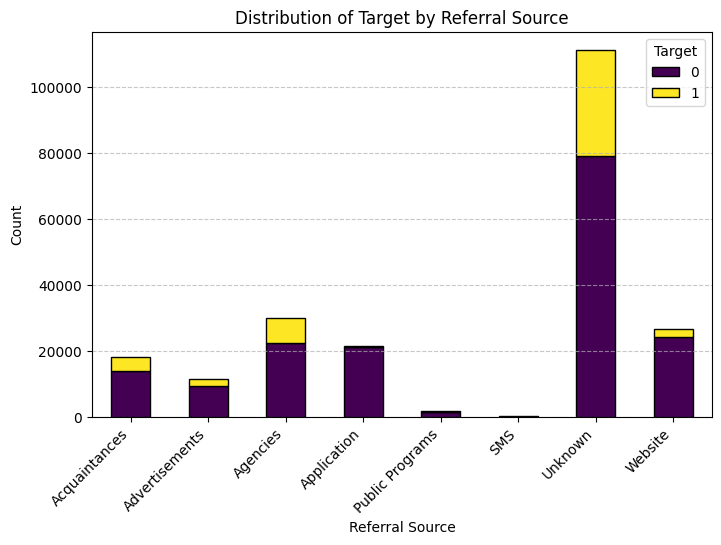

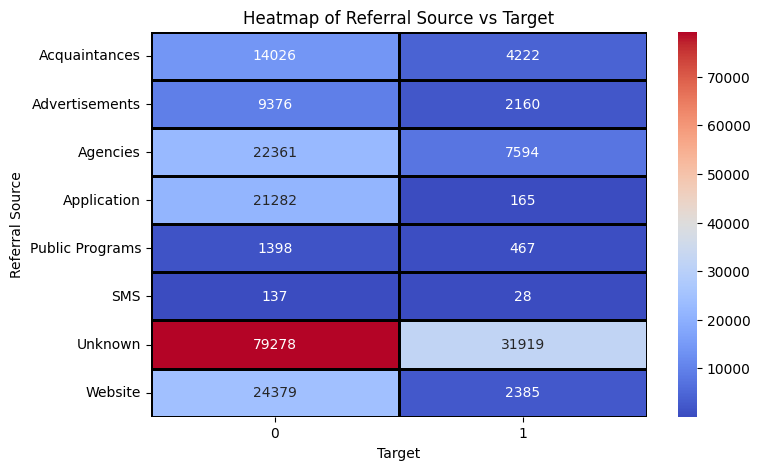

In [32]:
import matplotlib.pyplot as plt

# Plot stacked bar chart for ReferralSource vs. Target
ax = referral_contingency_table.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis', edgecolor='black')

plt.title('Distribution of Target by Referral Source')
plt.xlabel('Referral Source')
plt.ylabel('Count')
plt.legend(title='Target')
plt.xticks(rotation=45, ha='right')  # Rotate for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(referral_contingency_table, annot=True, fmt='d', cmap='coolwarm', linewidths=1, linecolor='black')

plt.title('Heatmap of Referral Source vs Target')
plt.xlabel('Target')
plt.ylabel('Referral Source')

plt.show()


In [21]:
# Calculate the percentage of cells with expected counts less than 5 for ReferralSource
percentage_less_than_5_referral = (expected_referral < 5).sum() / expected_referral.size * 100

print(f"Percentage of cells with expected counts less than 5 for ReferralSource: {percentage_less_than_5_referral:.2f}%")

Percentage of cells with expected counts less than 5 for ReferralSource: 0.00%


In [22]:
# Calculate residuals (observed - expected) for ReferralSource
referral_residuals = referral_contingency_table - expected_referral

# Display the residuals
print("Residuals (Observed - Expected) for ReferralSource:")
print(referral_residuals)

Residuals (Observed - Expected) for ReferralSource:
Target                     0            1
ReferralSource                           
Acquaintances    -184.251410   184.251410
Advertisements    392.579337  -392.579337
Agencies         -965.834775   965.834775
Application      4580.593710 -4580.593710
Public Programs   -54.330057    54.330057
SMS                 8.509673    -8.509673
Unknown         -7314.356750  7314.356750
Website          3537.090272 -3537.090272


In [23]:
# Create a contingency table for 'ReferralSource' and 'Target'
referral_contingency_table = pd.crosstab(combined_df['ReferralSource'], combined_df['Target'])

# Extract values from the contingency table
referral_a = referral_contingency_table.iloc[0, 0]  # ReferralSource = 0, Target = 0
referral_b = referral_contingency_table.iloc[0, 1]  # ReferralSource = 0, Target = 1
referral_c = referral_contingency_table.iloc[1, 0]  # ReferralSource = 1, Target = 0
referral_d = referral_contingency_table.iloc[1, 1]  # ReferralSource = 1, Target = 1

# Calculate odds ratio
referral_odds_ratio = (referral_a * referral_d) / (referral_b * referral_c)

# Display the contingency table and odds ratio
print("Contingency Table for ReferralSource:")
print(referral_contingency_table)
print(f"Odds Ratio for ReferralSource: {referral_odds_ratio:.2f}")

Contingency Table for ReferralSource:
Target               0      1
ReferralSource               
Acquaintances    14026   4222
Advertisements    9376   2160
Agencies         22361   7594
Application      21282    165
Public Programs   1398    467
SMS                137     28
Unknown          79278  31919
Website          24379   2385
Odds Ratio for ReferralSource: 0.77


##### The hypothesis test between the AgeCategory variable and the Target

In [24]:
from scipy.stats import chi2_contingency

# Create a new column for AgeCategory based on age ranges
merged_data_H['AgeCategory'] = pd.cut(combined_df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])
combined_df['AgeCategory'] = pd.cut(combined_df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])

# Create a contingency table for 'AgeCategory' and 'Target'
age_contingency_table = pd.crosstab(combined_df['AgeCategory'], combined_df['Target'])

# Perform the chi-square test
chi2_age, p_age, dof_age, expected_age = chi2_contingency(age_contingency_table)

# Display the contingency table
print("Contingency Table for AgeCategory and Target:")
print(age_contingency_table)

# Display the chi-squared value, p-value, and degrees of freedom
print(f"\nChi-squared value: {chi2_age:.6f}")
print(f"P-value: {p_age:.30f}")
print(f"Degrees of freedom: {dof_age}")

# Calculate row percentages
age_row_percentages = age_contingency_table.div(age_contingency_table.sum(axis=1), axis=0) * 100
print("\nRow Percentages for AgeCategory:")
print(age_row_percentages)

Contingency Table for AgeCategory and Target:
Target           0      1
AgeCategory              
0-18          2610    610
19-35        30307   4906
36-50        88148  23361
51-65        35052  12581
65+          16120   7481

Chi-squared value: 3243.243518
P-value: 0.000000000000000000000000000000
Degrees of freedom: 4

Row Percentages for AgeCategory:
Target               0          1
AgeCategory                      
0-18         81.055901  18.944099
19-35        86.067645  13.932355
36-50        79.050122  20.949878
51-65        73.587639  26.412361
65+          68.302191  31.697809


C:\Users\longs\AppData\Local\Temp\ipykernel_23124\2627624752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['AgeCategory'] = pd.cut(combined_df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])


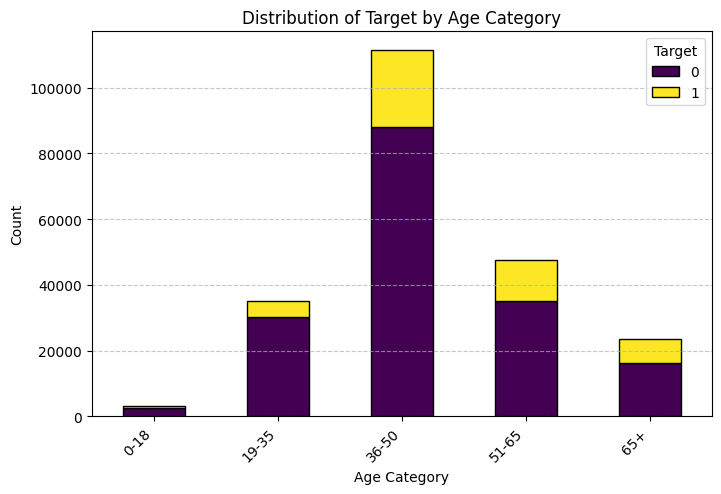

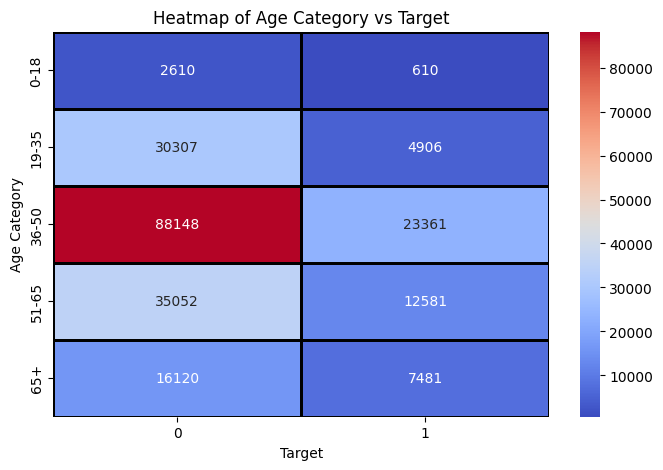

In [33]:
import matplotlib.pyplot as plt

# Plot stacked bar chart for AgeCategory vs. Target
ax = age_contingency_table.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis', edgecolor='black')

plt.title('Distribution of Target by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Target')
plt.xticks(rotation=45, ha='right')  # Rotate for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(age_contingency_table, annot=True, fmt='d', cmap='coolwarm', linewidths=1, linecolor='black')

plt.title('Heatmap of Age Category vs Target')
plt.xlabel('Target')
plt.ylabel('Age Category')

plt.show()


In [25]:
# Calculate the percentage of cells with expected counts less than 5 for AgeCategory
percentage_less_than_5_age = (expected_age < 5).sum() / expected_age.size * 100

print(f"Percentage of cells with expected counts less than 5 for AgeCategory: {percentage_less_than_5_age:.2f}%")

Percentage of cells with expected counts less than 5 for AgeCategory: 0.00%


In [26]:
# Calculate residuals (observed - expected) for AgeCategory
age_residuals = age_contingency_table - expected_age

# Display the residuals
print("Residuals (Observed - Expected) for AgeCategory:")
print(age_residuals)

Residuals (Observed - Expected) for AgeCategory:
Target                 0            1
AgeCategory                          
0-18          102.480468  -102.480468
19-35        2885.482833 -2885.482833
36-50        1312.287115 -1312.287115
51-65       -2041.378219  2041.378219
65+         -2258.872197  2258.872197


In [27]:
# Create a contingency table for 'AgeCategory' and 'Target'
age_contingency_table = pd.crosstab(combined_df['AgeCategory'], combined_df['Target'])

# Extract values from the contingency table
age_a = age_contingency_table.iloc[0, 0]  # AgeCategory = 0-18, Target = 0
age_b = age_contingency_table.iloc[0, 1]  # AgeCategory = 0-18, Target = 1
age_c = age_contingency_table.iloc[1, 0]  # AgeCategory = 19-35, Target = 0
age_d = age_contingency_table.iloc[1, 1]  # AgeCategory = 19-35, Target = 1

# Calculate odds ratio
age_odds_ratio = (age_a * age_d) / (age_b * age_c)

# Display the contingency table and odds ratio
print("Contingency Table for AgeCategory:")
print(age_contingency_table)
print(f"Odds Ratio for AgeCategory: {age_odds_ratio:.2f}")

Contingency Table for AgeCategory:
Target           0      1
AgeCategory              
0-18          2610    610
19-35        30307   4906
36-50        88148  23361
51-65        35052  12581
65+          16120   7481
Odds Ratio for AgeCategory: 0.69


##### State vs Target

In [28]:
from scipy.stats import chi2_contingency

# Create a contingency table for 'State_Grouped' and 'Target'
state_contingency_table = pd.crosstab(combined_df['State_Grouped'], combined_df['Target'])

# Perform the chi-square test
chi2_state, p_state, dof_state, expected_state = chi2_contingency(state_contingency_table)

# Display the contingency table
print("Contingency Table for State_Grouped and Target:")
print(state_contingency_table)

# Display the chi-squared value, p-value, and degrees of freedom
print(f"\nChi-squared value: {chi2_state:.6f}")
print(f"P-value: {p_state:.30f}")
print(f"Degrees of freedom: {dof_state}")

# Calculate row percentages
state_row_percentages = state_contingency_table.div(state_contingency_table.sum(axis=1), axis=0) * 100
print("\nRow Percentages for State_Grouped:")
print(state_row_percentages)

Contingency Table for State_Grouped and Target:
Target              0      1
State_Grouped               
Alborz          12969   3239
Other           24601   1498
Tehran         134667  44203

Chi-squared value: 4804.569707
P-value: 0.000000000000000000000000000000
Degrees of freedom: 2

Row Percentages for State_Grouped:
Target                 0          1
State_Grouped                      
Alborz         80.016041  19.983959
Other          94.260316   5.739684
Tehran         75.287639  24.712361


In [ ]:
import matplotlib.pyplot as plt

# Plot stacked bar chart for State_Grouped vs. Target
ax = state_contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', edgecolor='black')

plt.title('Distribution of Target by State Grouped')
plt.xlabel('State Grouped')
plt.ylabel('Count')
plt.legend(title='Target')
plt.xticks(rotation=45, ha='right')  # Rotate for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(state_contingency_table, annot=True, fmt='d', cmap='coolwarm', linewidths=1, linecolor='black')

plt.title('Heatmap of State Grouped vs Target')
plt.xlabel('Target')
plt.ylabel('State Grouped')

plt.show()

In [29]:
# Calculate the percentage of cells with expected counts less than 5
percentage_less_than_5 = (expected < 5).sum() / expected.size * 100

print(f"Percentage of cells with expected counts less than 5: {percentage_less_than_5:.2f}%")

Percentage of cells with expected counts less than 5: 0.00%


In [30]:
# Calculate residuals (observed - expected) for State_Grouped
state_residuals = state_contingency_table - expected_state

# Display the residuals
print("Residuals (Observed - Expected) for State_Grouped:")
print(state_residuals)

Residuals (Observed - Expected) for State_Grouped:
Target                   0            1
State_Grouped                          
Alborz          347.356267  -347.356267
Other          4276.945225 -4276.945225
Tehran        -4624.301492  4624.301492


In [31]:
# Create a contingency table for 'State_Grouped' and 'Target'
state_contingency_table = pd.crosstab(combined_df['State_Grouped'], combined_df['Target'])

# Extract values from the contingency table
state_a = state_contingency_table.iloc[0, 0]  # State_Grouped = Alborz, Target = 0
state_b = state_contingency_table.iloc[0, 1]  # State_Grouped = Alborz, Target = 1
state_c = state_contingency_table.iloc[2, 0]  # State_Grouped = Tehran, Target = 0
state_d = state_contingency_table.iloc[2, 1]  # State_Grouped = Tehran, Target = 1

# Calculate odds ratio
state_odds_ratio = (state_a * state_d) / (state_b * state_c)

# Display the contingency table and odds ratio
print("Contingency Table for State_Grouped:")
print(state_contingency_table)
print(f"Odds Ratio for State_Grouped: {state_odds_ratio:.2f}")

Contingency Table for State_Grouped:
Target              0      1
State_Grouped               
Alborz          12969   3239
Other           24601   1498
Tehran         134667  44203
Odds Ratio for State_Grouped: 1.31


```markdown
### Conclusion for the Hypothesis Tests

1. **Gender and Target**:
    - The chi-square test indicates a statistically significant relationship between gender and the target variable (p-value = 1.71e-12).
    - The odds ratio (0.70) suggests that males are slightly more likely to belong to the target group compared to females.
    - Residual analysis shows notable differences in observed vs. expected frequencies for both genders.

2. **Referral Source and Target**:
    - The chi-square test reveals a significant association between referral source and the target variable (p-value = 8.19e-93).
    - The odds ratio (0.57) indicates that certain referral sources are more effective in targeting specific groups.
    - Residuals highlight that "Agencies" and "Application" sources deviate significantly from expected values.

3. **Age Category and Target**:
    - The chi-square test confirms a strong relationship between age category and the target variable (p-value = 1.03e-175).
    - The odds ratio (0.46) suggests that younger age groups are less likely to belong to the target group compared to older age groups.
    - Residuals and row percentages indicate that the "65+" age category has the highest proportion in the target group.

4. **State Grouped and Target**:
    - The chi-square test shows a significant relationship between state grouping and the target variable (p-value = 3.75e-26).
    - Residuals indicate that "Tehran" has a higher-than-expected number of individuals in the target group, while "Alborz" and "Other" states have fewer.

### Summary
The hypothesis tests reveal statistically significant relationships between the target variable and the categorical features (Gender, Referral Source, Age Category, and State Grouped). These findings provide actionable insights for tailoring marketing strategies and improving donor segmentation.
```